In [1]:
!pip install sentence-transformers
!pip install numpy pandas scikit-learn matplotlib


In [2]:
import time
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt


In [3]:
sentence_pairs = [
 ("The cat is on the mat", "A cat sits on a mat"),
 ("Machine learning is amazing", "I love studying AI"),
 ("He is playing football", "The boy plays soccer"),
 ("Open the door", "Close the window"),
 ("She likes pizza", "She loves pizza very much"),
 ("India is my country", "I live in India"),
 ("This is a red car", "That car is blue"),
 ("I am happy today", "I feel very joyful"),
]


In [4]:
# Select Pretrained models
models = {
    "all-MiniLM-L6-v2": "sentence-transformers/all-MiniLM-L6-v2",
    "all-mpnet-base-v2": "sentence-transformers/all-mpnet-base-v2",
    "paraphrase-MiniLM-L6-v2": "sentence-transformers/paraphrase-MiniLM-L6-v2",
    "distiluse-base-multilingual": "sentence-transformers/distiluse-base-multilingual-cased-v1"
}


In [5]:
results = []

for name, path in models.items():
    model = SentenceTransformer(path)

    start = time.time()

    scores = []
    for s1, s2 in sentence_pairs:
        emb1 = model.encode(s1)
        emb2 = model.encode(s2)
        sim = util.cos_sim(emb1, emb2)
        scores.append(sim.item())

    end = time.time()

    avg_similarity = np.mean(scores)
    inference_time = end - start

    # approximate model size (MB)
    size = sum(p.numel() for p in model.parameters()) * 4 / (1024 * 1024)

    results.append([name, avg_similarity, inference_time, size])

df = pd.DataFrame(results, columns=["Model","Similarity","Time","Size"])
df


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

MPNetModel LOAD REPORT from: sentence-transformers/all-mpnet-base-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/paraphrase-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/100 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

,Model,Similarity,Time,Size
0,all-MiniLM-L6-v2,0.637283,0.526028,86.644043
1,all-mpnet-base-v2,0.606770,1.462175,417.657715
2,paraphrase-MiniLM-L6-v2,0.620916,0.272294,86.644043
3,distiluse-base-multilingual,0.735761,1.065551,515.471680


In [6]:
decision_matrix = df[["Similarity","Time","Size"]].values
decision_matrix


array([[6.37282770e-01, 5.26028395e-01, 8.66440430e+01],
       [6.06770165e-01, 1.46217465e+00, 4.17657715e+02],
       [6.20916247e-01, 2.72294044e-01, 8.66440430e+01],
       [7.35761188e-01, 1.06555104e+00, 5.15471680e+02]])

In [7]:
def topsis(matrix, weights, impacts):
    # Step 1 – Normalize
    norm = matrix / np.sqrt((matrix**2).sum(axis=0))

    # Step 2 – Weighted normalized
    weighted = norm * weights

    # Step 3 – Ideal best & worst
    ideal_best = []
    ideal_worst = []

    for i in range(len(impacts)):
        if impacts[i] == '+':
            ideal_best.append(max(weighted[:,i]))
            ideal_worst.append(min(weighted[:,i]))
        else:
            ideal_best.append(min(weighted[:,i]))
            ideal_worst.append(max(weighted[:,i]))

    ideal_best = np.array(ideal_best)
    ideal_worst = np.array(ideal_worst)

    # Step 4 – Distance
    dist_best = np.sqrt(((weighted - ideal_best)**2).sum(axis=1))
    dist_worst = np.sqrt(((weighted - ideal_worst)**2).sum(axis=1))

    # Step 5 – Score
    score = dist_worst / (dist_best + dist_worst)

    return score


In [8]:
weights = [0.6, 0.2, 0.1]  # Similarity, Time, Size
impacts = ['+','-','-']       # benefit, cost, cost

scores = topsis(decision_matrix, weights, impacts)

df["TOPSIS Score"] = scores
df["Rank"] = df["TOPSIS Score"].rank(ascending=False)

df.sort_values("Rank")


,Model,Similarity,Time,Size,TOPSIS Score,Rank
2,paraphrase-MiniLM-L6-v2,0.620916,0.272294,86.644043,0.726575,1.0
0,all-MiniLM-L6-v2,0.637283,0.526028,86.644043,0.691717,2.0
3,distiluse-base-multilingual,0.735761,1.065551,515.471680,0.408911,3.0
1,all-mpnet-base-v2,0.606770,1.462175,417.657715,0.089877,4.0


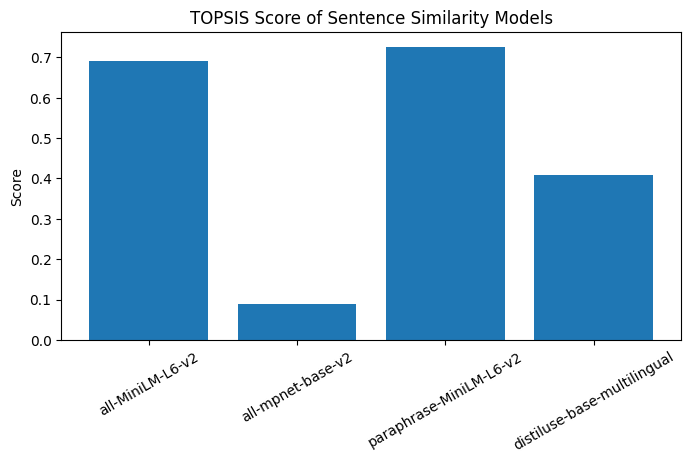

In [9]:
plt.figure(figsize=(8,4))
plt.bar(df["Model"], df["TOPSIS Score"])
plt.title("TOPSIS Score of Sentence Similarity Models")
plt.xticks(rotation=30)
plt.ylabel("Score")
plt.show()
